In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

In [ ]:
loan= pd.read_csv('/content/raw-data.csv',low_memory=False)

In [ ]:
#Renaming columns in the dataset with their correct names
loan = loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
loan.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#EDA.

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
# Missing values treatmentt
loan.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

In [ ]:
loan.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


Text(0.5, 1.0, 'Ratio of male and female who took loan')

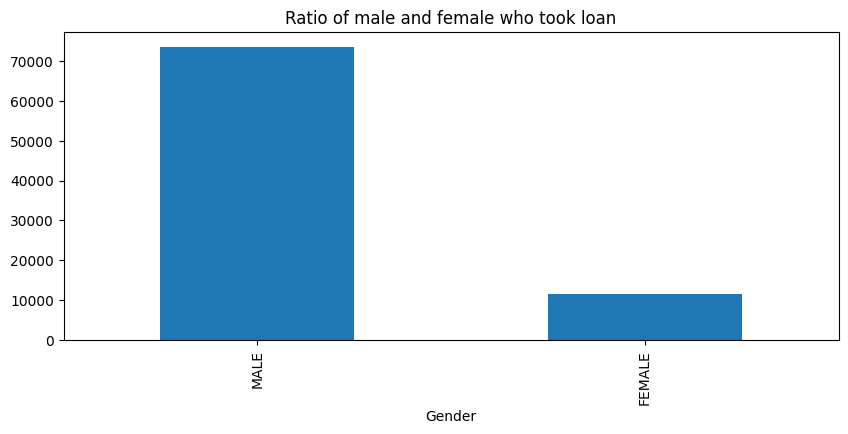

In [ ]:
#Ratio of Male and female who took loan
loan.Gender.value_counts().plot(kind = "bar", figsize = (10,4))
plt.title("Ratio of male and female who took loan")

Text(0.5, 1, 'Class counts')

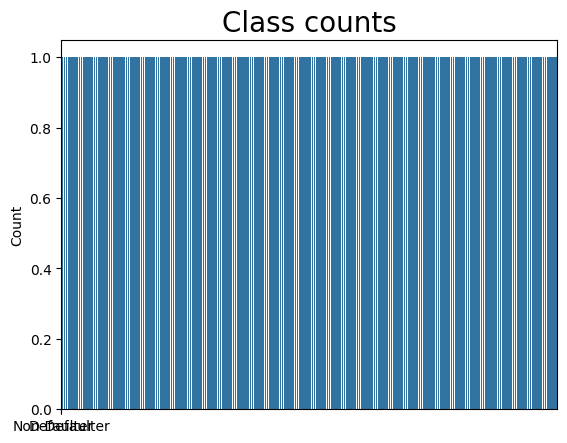

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Getting the number of positive and negative examples.
sns.countplot(loan['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

In [ ]:
loan['Target variable'].value_counts()

Target variable
0    83194
1     1854
Name: count, dtype: int64

**`Age at which client took the loan`**

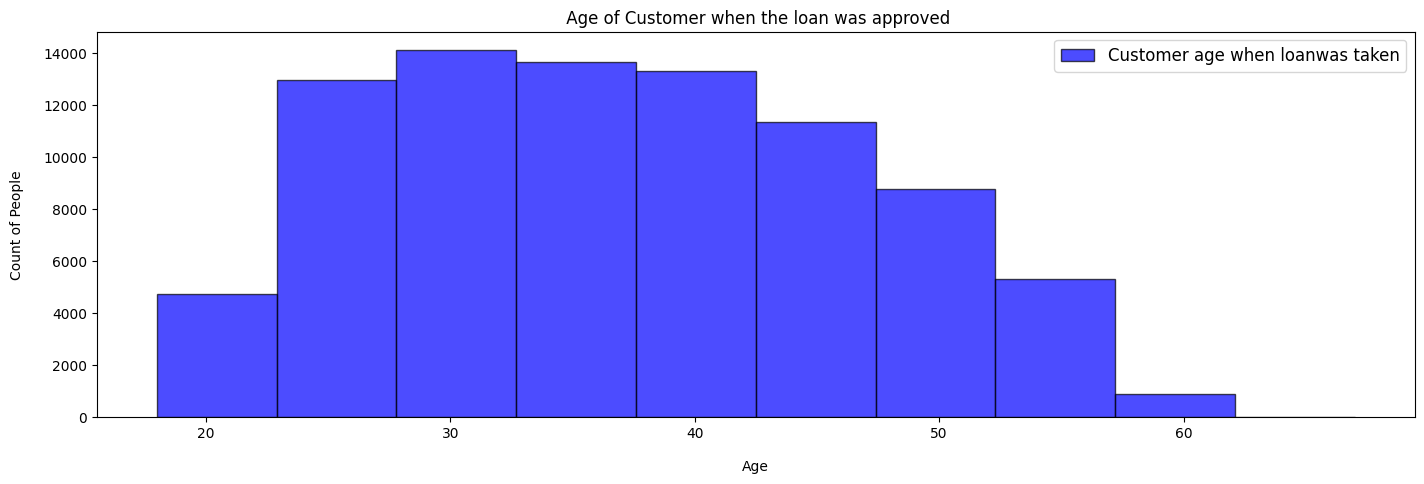

In [ ]:
plt.figure(figsize=(17,5))

#bar plot
loan['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<ipython-input-12-66cdce84921b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=loan['Customer age when loanwas taken'],y='Loan Amount',data=loan,palette='viridis')


<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

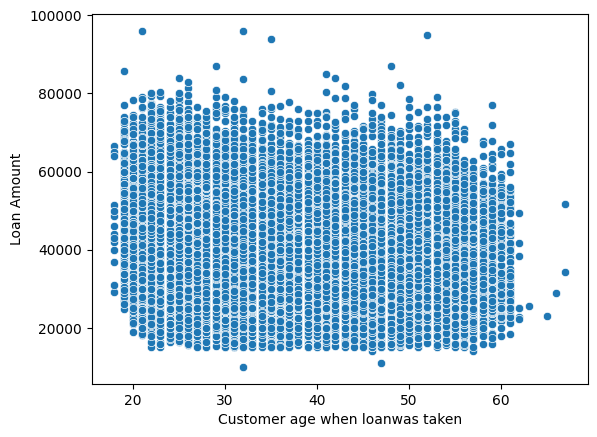

In [ ]:
#Customer age when loanwas taken
sns.scatterplot(x=loan['Customer age when loanwas taken'],y='Loan Amount',data=loan,palette='viridis')

<Axes: xlabel='Customer age when loanwas taken', ylabel='Target variable'>

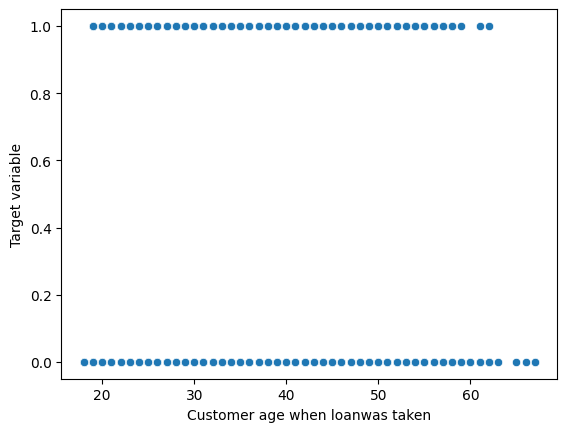

In [ ]:
sns.scatterplot(x=loan['Customer age when loanwas taken'],y='Target variable',data=loan)

In [ ]:
#drops columns not necessary
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

loan.drop(dropped,axis=1,inplace=True)

In [ ]:
loan.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,40.0,1,1,0,0,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,47.0,1,1,0,0,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,31.0,9,6,3,0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,24.0,1,1,0,0,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,30.0,1,1,0,0,0,0,0,TIER 1,0


DATA CLEANING

In [ ]:
data=loan.copy()

In [ ]:
Categorical_Variables = data.select_dtypes(include=['object'])
Numerical_Variables = data.select_dtypes(include=['float','int'])

In [ ]:
#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=Categorical_Variables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=Numerical_Variables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
data.head()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,3,...,40.0,1,1,0,0,0,0,0,0,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,1,...,47.0,1,1,0,0,0,0,0,0,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,3,...,31.0,9,6,3,0,31,31,16,0,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,3,...,24.0,1,1,0,0,0,0,0,0,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0,...,30.0,1,1,0,0,0,0,0,0,0


In [ ]:
#For quantitative data
from sklearn.impute import SimpleImputer
numerical_cols = data[Numerical_Variables]
categorical_cols = data[Categorical_Variables]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
lat = imp_mean.fit_transform(numerical_cols)
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
g_se = imp_mode.fit_transform(categorical_cols)


In [ ]:
g_se.shape


(85048, 0)

In [ ]:
data['Categorical_Variables']=g_se
data['Numerical_Variables']=lat

In [ ]:
Categorical_Variables

""
0
1
2
3
4
...
85043
85044
85045
85046


In [ ]:
Numerical_Variables

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,3,...,40.0,1,1,0,0,0,0,0,0,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,1,...,47.0,1,1,0,0,0,0,0,0,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,3,...,31.0,9,6,3,0,31,31,16,0,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,3,...,24.0,1,1,0,0,0,0,0,0,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0,...,30.0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85043,85044,0,0,14.0,0.0,2941.0,47900.0,18.0,1375.0,3,...,47.0,4,1,3,0,5,3,0,0,0
85044,85045,0,0,10.0,0.0,2870.0,41000.0,15.0,20061.0,0,...,35.0,1,1,0,0,0,0,0,3,0
85045,85046,0,0,10.0,0.0,2720.0,28350.0,12.0,3982.0,1,...,46.0,5,1,1,0,6,6,3,1,0
85046,85047,0,0,8.0,0.0,3500.0,50000.0,15.0,1151.0,3,...,56.0,2,2,0,0,0,0,0,2,0


In [ ]:
for var in data[Numerical_Variables]:
    data[var]=data[var].fillna(data[var].median())

ValueError: putmask: mask and data must be the same size

In [ ]:
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in Categorical_Variables:
    data[i] = le.fit_transform(data[i])
data.head()


,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable,Categorical_Variables,Numerical_Variables
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,3,...,1,0,0,0,0,0,0,0,4.826129e-310,4.826125e-310
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,1,...,1,0,0,0,0,0,0,0,4.826129e-310,4.826125e-310
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,3,...,6,3,0,31,31,16,0,0,4.826129e-310,4.826125e-310
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,3,...,1,0,0,0,0,0,0,0,4.826129e-310,4.826125e-310
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0,...,1,0,0,0,0,0,0,0,4.826129e-310,4.826125e-310


In [ ]:
Categorical_Variables

""
0
1
2
3
4
...
85043
85044
85045
85046


In [ ]:
_